# Práctica 1: Sensado y análisis de datos Inerciales
## Evaluación de rutina de ejercicio.

### Librerias

In [2]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Lectura de datos

In [4]:
folder = "./Data/"
dir_list = os.listdir(folder)
dir_list.sort()
list_df = {}
for i in dir_list:
    df = pd.read_csv(folder + i)
    list_df[i[:-4]] = df

In [5]:
folder = "./Segmentado/"
dir_list = os.listdir(folder)
dir_list.sort()
segmentado_df = []
for i in dir_list:
    df = pd.read_csv(folder + i)
    segmentado_df.append(df)

segmentado_df = pd.concat(segmentado_df)
segmentado_df.reset_index(drop=True, inplace=True)

In [39]:
segmentado_df

,subject,rep,inicio,fin,label
0,Ariana,1,3.6,7.6,2
1,Ariana,2,8.1,12.2,0
2,Ariana,3,12.4,16.0,0
3,Ariana,4,16.2,19.5,0
4,Jonathan,1,3.3,8.5,2
5,Jonathan,2,8.6,12.8,2
6,Jonathan,3,13.0,17.2,2
7,Jonathan,4,17.4,21.6,2
8,Jonathan,5,21.8,25.5,2
9,cristian,1,4.5,9.0,2


### Limpieza y procesado de datos

In [6]:
for index in list_df:
# Renombrar columnas
    columnas = list_df[index].columns
    list_df[index].columns = [col.replace(' ', '').split('(')[0] for col in columnas]
# Transformar datos
    list_df[index]['TimeStamp'] = pd.to_datetime(list_df[index]['TimeStamp'], unit='s')
# Seleccionamos las fetures que analizaremos
    list_df[index] = list_df[index][['SensorId', 'TimeStamp', 'FrameNumber', 'AccX', 'AccY', 'AccZ', 'GyroX','GyroY', 'GyroZ', 'MagX', 'MagY', 'MagZ', 'EulerX', 'EulerY', 'EulerZ']]
    if index in ["Scarlett", "Juan", "Ariana", "Rachel"]:
        list_df[index].loc[list_df[index]['SensorId'] == 3, 'SensorId'] = 4

In [20]:
# Estimar los totales
for index in list_df:
    df = list_df[index]
    df['AccTotal'] = np.sqrt(df['AccX']**2 + df['AccY']**2 + df['AccZ']**2)
    df['GyroTotal'] = np.sqrt(df['GyroX']**2 + df['GyroY']**2 + df['GyroZ']**2)
    df['MagTotal'] = np.sqrt(df['MagX']**2 + df['MagY']**2 + df['MagZ']**2)
    df['EulerTotal'] = np.sqrt(df['EulerX']**2 + df['EulerY']**2 + df['EulerZ']**2)
    

### Analisis exploratorio

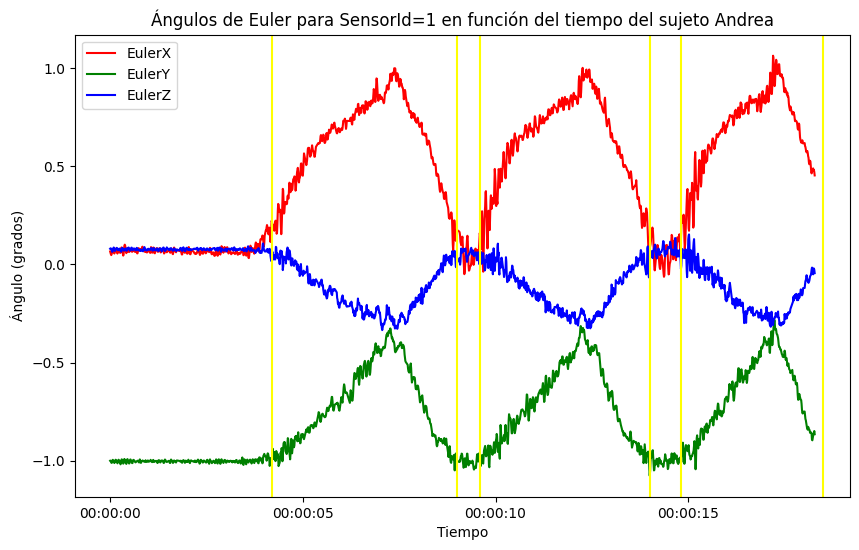

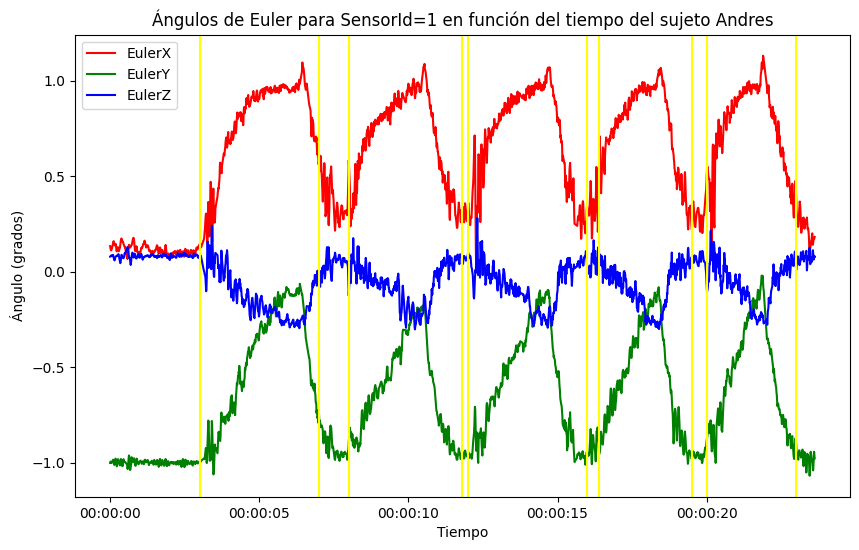

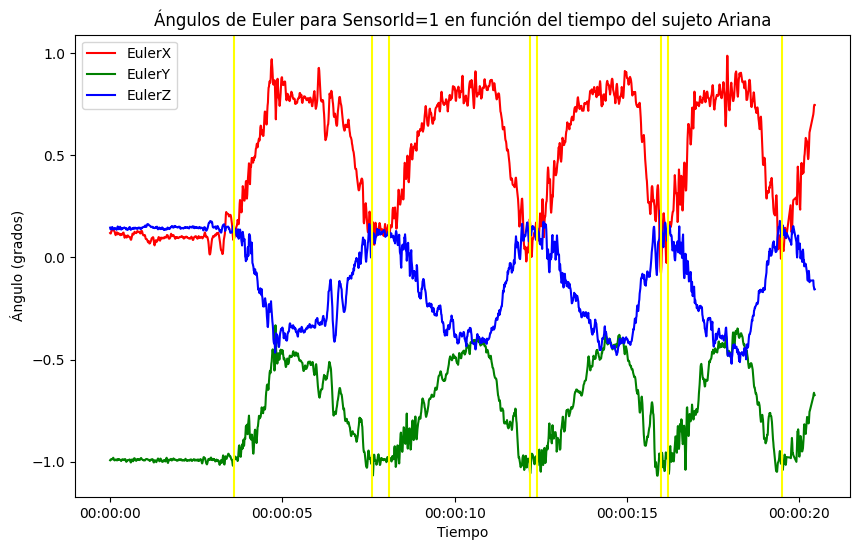

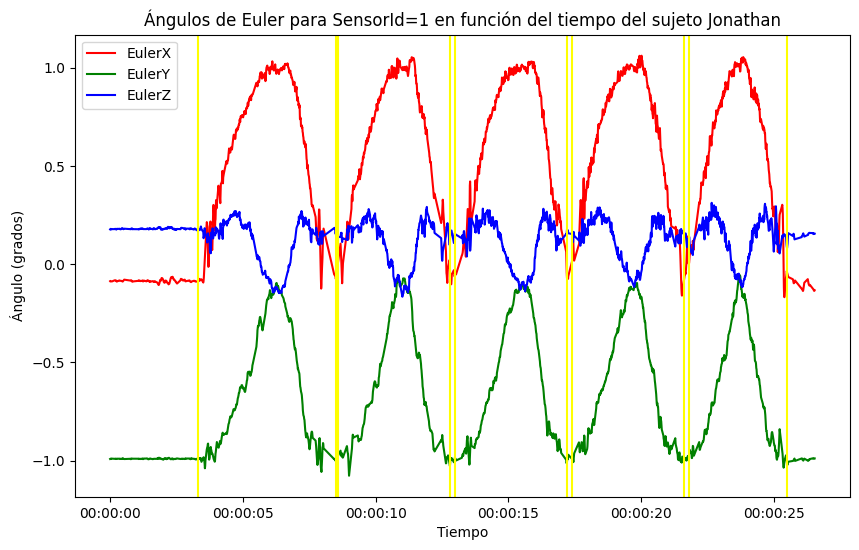

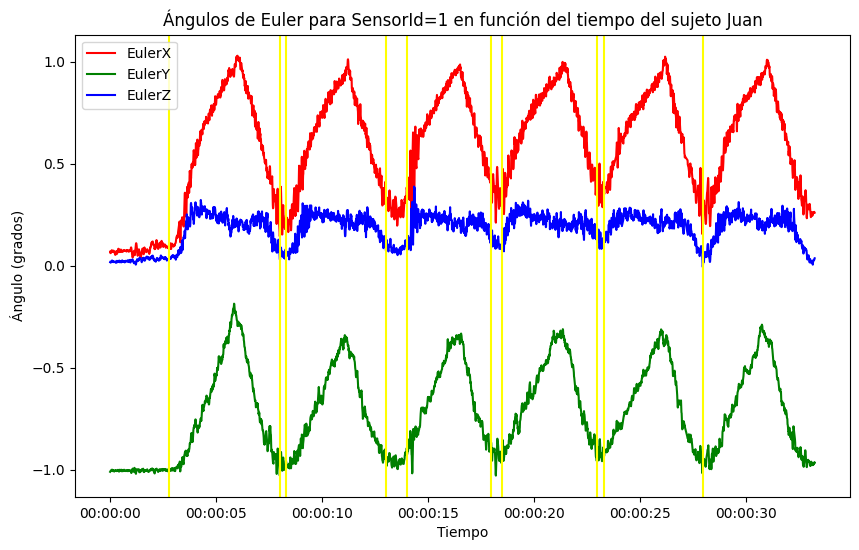

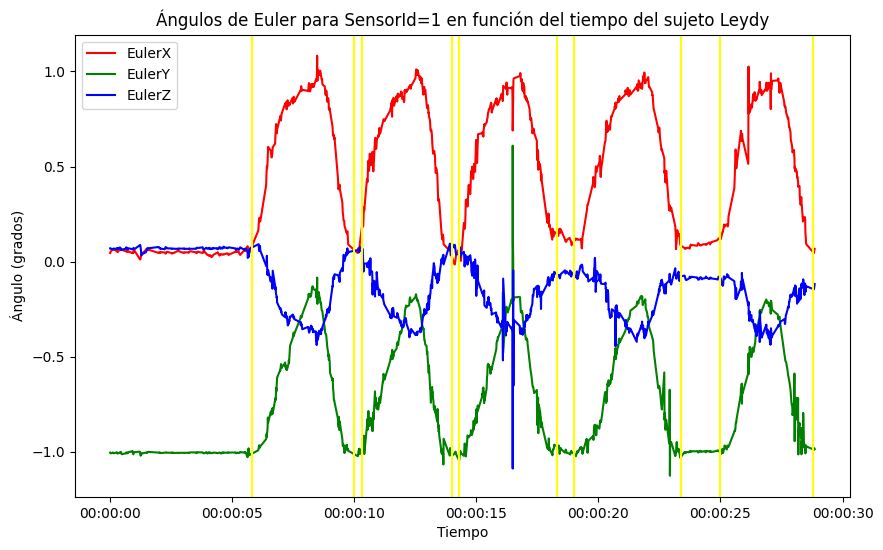

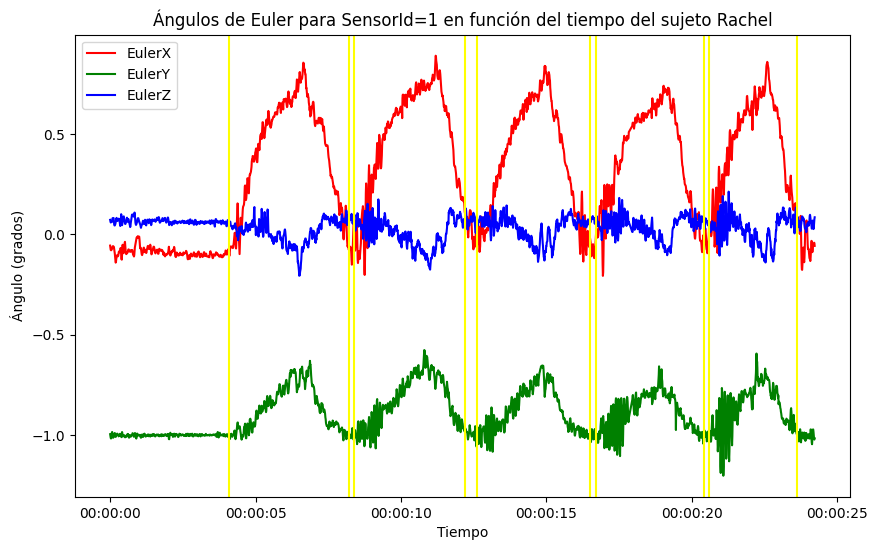

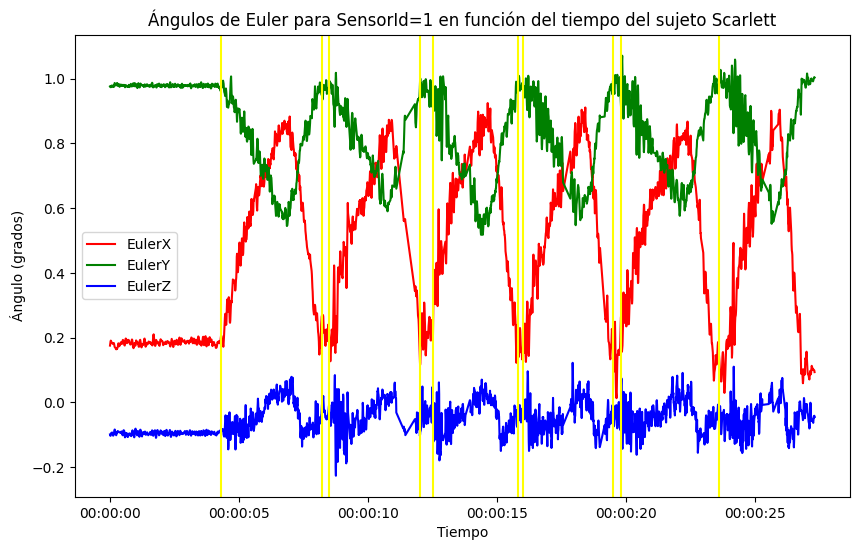

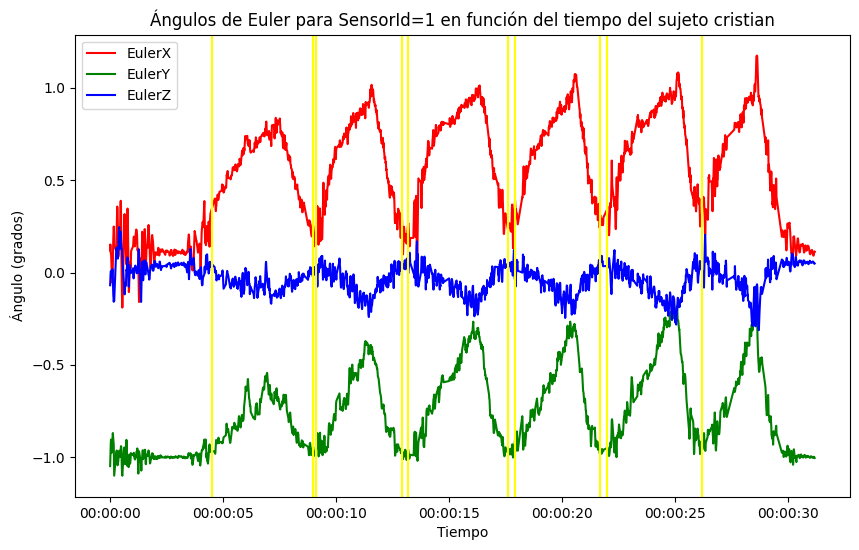

In [10]:
for index in list_df:
    df = list_df[index]
    # Filtrar los datos por SensorId 
    df_sensor_id = df[df["SensorId"] == 1]
    segmentos = segmentado_df[segmentado_df["subject"] == index]
    # Suponiendo que start_time y end_time son valores en segundo
    # Graficar los ángulos de Euler en función del tiempo para SensorId igual a 1
    plt.figure(figsize=(10, 6))
    plt.plot(df_sensor_id['TimeStamp'], df_sensor_id['AccX'], label='EulerX', color='red')
    plt.plot(df_sensor_id['TimeStamp'], df_sensor_id['AccY'], label='EulerY', color='green')
    plt.plot(df_sensor_id['TimeStamp'], df_sensor_id['AccZ'], label='EulerZ', color='blue')
    for i, row in segmentos.iterrows():
        start_time = row["inicio"]
        end_time = row["fin"]
        start_time = pd.to_datetime(start_time, unit='s')
        end_time = pd.to_datetime(end_time, unit='s')
        plt.axvline(x=start_time, color='yellow', linestyle='-')
        plt.axvline(x=end_time, color='yellow', linestyle='-')
    plt.title(f'Ángulos de Euler para SensorId=1 en función del tiempo del sujeto {index}')
    plt.xlabel('Tiempo')
    plt.ylabel('Ángulo (grados)')
    plt.legend()
    plt.show()


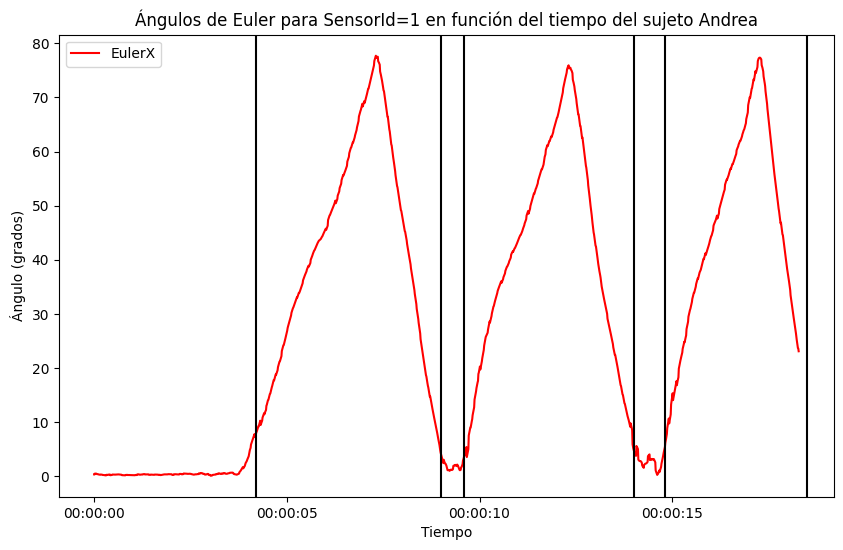

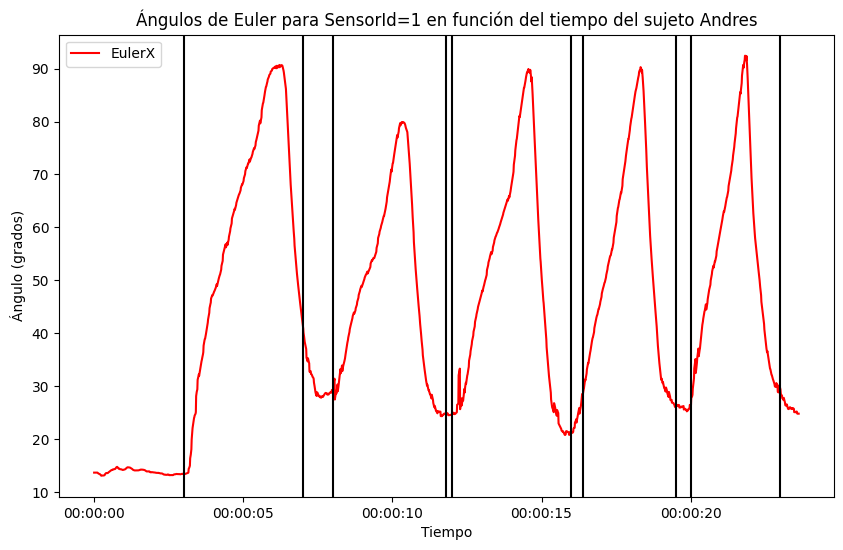

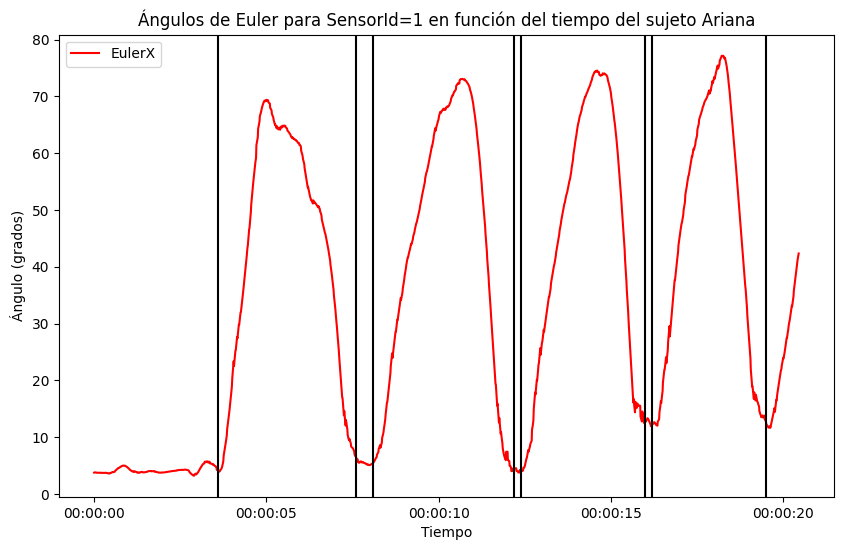

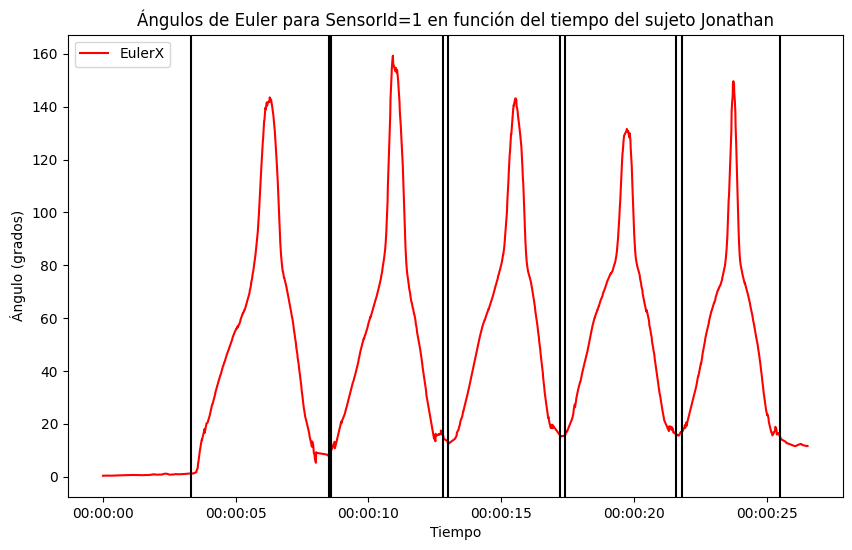

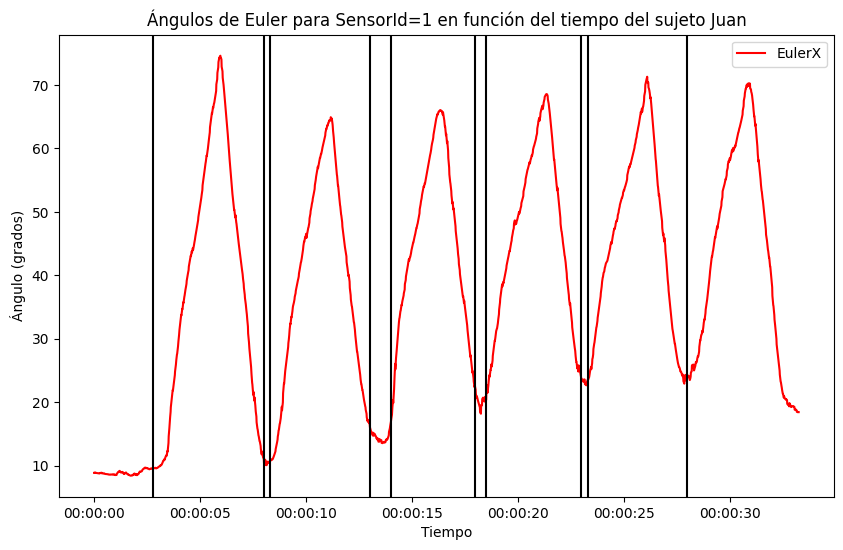

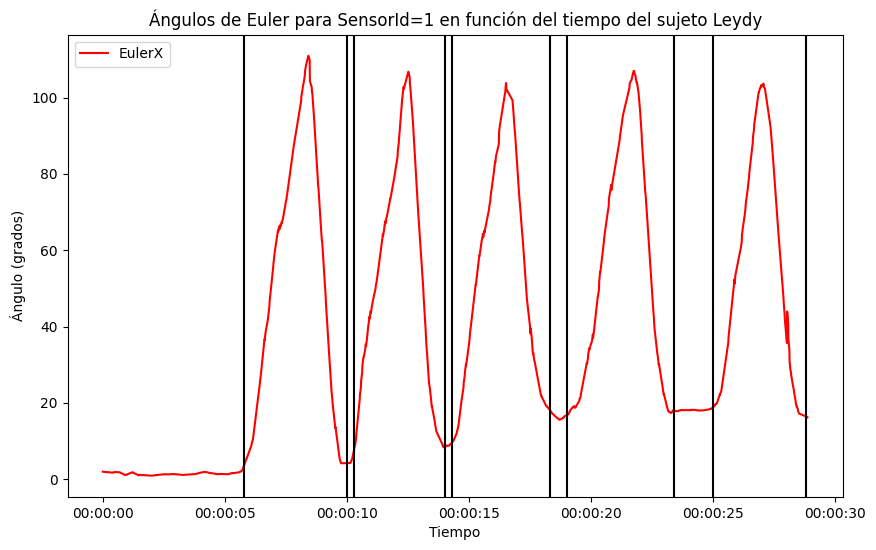

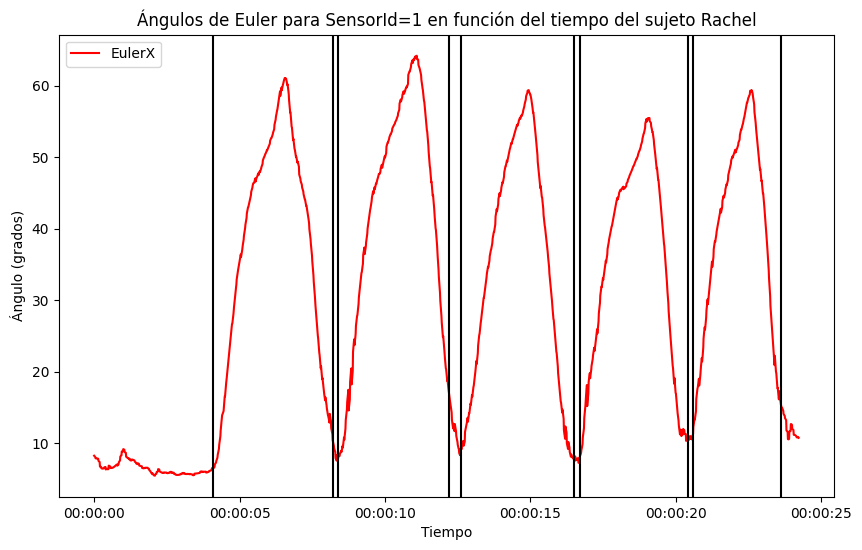

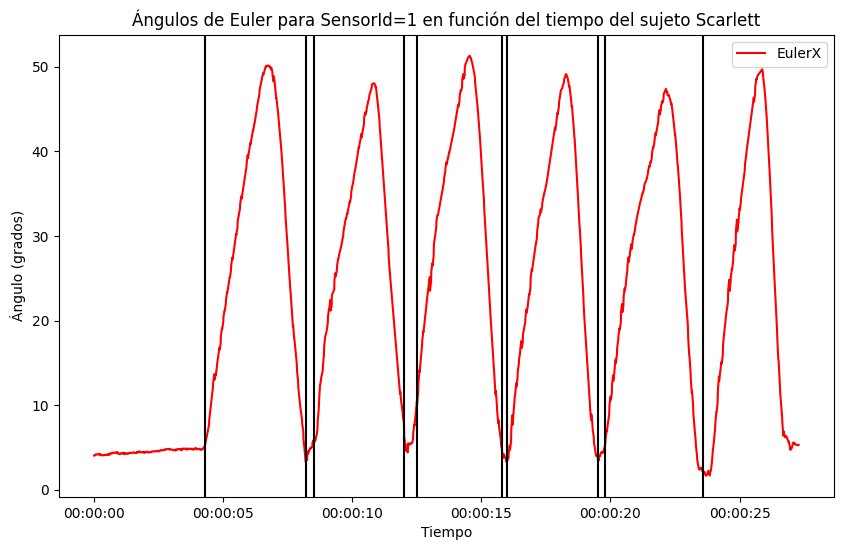

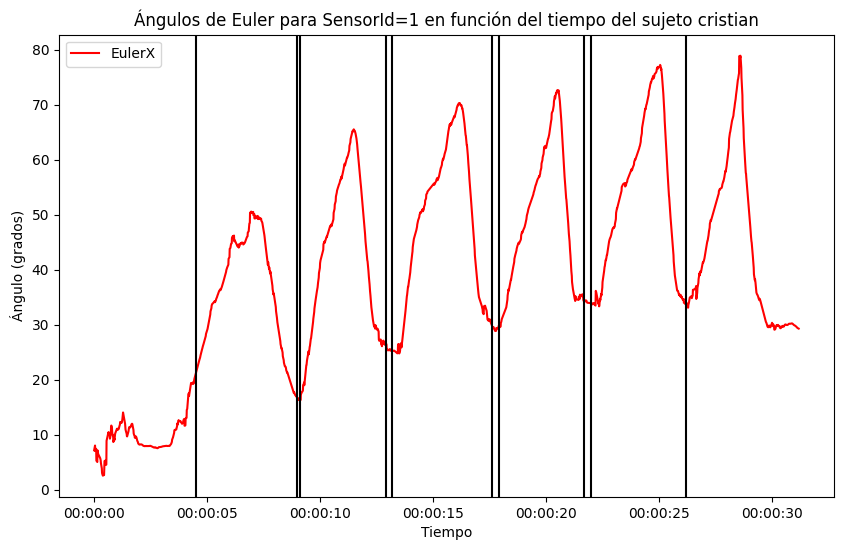

In [22]:
for index in list_df:
    df = list_df[index]
    # Filtrar los datos por SensorId 
    df_sensor_id = df[df["SensorId"] == 1]
    segmentos = segmentado_df[segmentado_df["subject"] == index]
    # Suponiendo que start_time y end_time son valores en segundo
    # Graficar los ángulos de Euler en función del tiempo para SensorId igual a 1
    plt.figure(figsize=(10, 6))
    plt.plot(df_sensor_id['TimeStamp'], df_sensor_id['EulerTotal'], label='EulerX', color='red')
    for i, row in segmentos.iterrows():
        start_time = row["inicio"]
        end_time = row["fin"]
        start_time = pd.to_datetime(start_time, unit='s')
        end_time = pd.to_datetime(end_time, unit='s')
        plt.axvline(x=start_time, color='black', linestyle='-')
        plt.axvline(x=end_time, color='black', linestyle='-')
    plt.title(f'Ángulos de Euler para SensorId=1 en función del tiempo del sujeto {index}')
    plt.xlabel('Tiempo')
    plt.ylabel('Ángulo (grados)')
    plt.legend()
    plt.show()

### Segmentado

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponiendo que list_df es un diccionario de DataFrames y segmentado_df es otro DataFrame
# Preparar un diccionario para almacenar los datos de los segmentos con sus etiquetas
segment_data = {}

for index in list_df:
    df = list_df[index]
    segmentos = segmentado_df[segmentado_df["subject"] == index]
    
    # Lista para almacenar datos de segmentos para este sujeto
    segment_data[index] = []
    
    for i, row in segmentos.iterrows():
        start_time = row["inicio"]
        end_time = row["fin"]
        label = row["label"]  # Etiqueta del segmento actual
        start_time = pd.to_datetime(start_time, unit='s')
        end_time = pd.to_datetime(end_time, unit='s')
        
        segment_df = df[(df['TimeStamp'] >= start_time) & (df['TimeStamp'] <= end_time)].copy()
        segment_df['label'] = label
        
        # Almacenar los datos filtrados del segmento junto con su etiqueta
        segment_data[index].append(segment_df)

### Extracción de caracteristicas

In [38]:
import tsfel
import pandas as pd

# Obtener la configuración por defecto de TSFEL para la extracción de características temporales
cfg = tsfel.get_features_by_domain("temporal")

# Inicializar un DataFrame vacío para los vectores de características
features_df = pd.DataFrame()

# Suponer que segment_data es un diccionario con los segmentos de datos de cada sujeto,
# donde cada segmento ya tiene asociada su etiqueta 'label'.
for subject, segments in segment_data.items():
    for segment_df in segments:
        # Asegurarse de que el DataFrame del segmento contenga las columnas requeridas
        if all(column in segment_df.columns for column in ['AccTotal', 'GyroTotal', 'MagTotal', 'EulerTotal']):
            # Seleccionar solo las columnas de interés y convertirlas a un formato adecuado para TSFEL
            segment_data = segment_df[['AccTotal', 'GyroTotal', 'MagTotal', 'EulerTotal']].values

            # Calcular las características para este segmento
            features = tsfel.time_series_features_extractor(cfg, segment_data, fs=1)
            
            # Verificar si 'features' es un DataFrame y luego añadir la etiqueta del segmento
            if isinstance(features, pd.DataFrame):
                # Añadir la etiqueta del segmento de manera segura
                features['label'] = segment_df['label'].iloc[0]  
                # Concatenar con el DataFrame de características
                features_df = pd.concat([features_df, features], ignore_index=True)

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,...,3_Median absolute diff,3_Median diff,3_Negative turning points,3_Neighbourhood peaks,3_Positive turning points,3_Signal distance,3_Slope,3_Sum absolute diff,3_Zero crossing rate,label
0,1775.878061,1783.370903,886.503389,0.021175,1.617316e-05,0.012181,-3.017534e-04,473.0,83.0,472.0,...,0.194279,0.000000,220.0,60.0,306.0,13957.447033,0.003338,12838.031840,297.0,2
1,1651.298230,1658.265918,823.668096,0.023487,-4.101498e-06,0.014201,-5.322836e-04,410.0,78.0,411.0,...,0.197007,0.000000,204.0,55.0,281.0,13366.311202,0.001908,12341.317827,267.0,2
2,1359.446282,1368.122144,678.902350,0.028384,1.550087e-05,0.015115,-9.711450e-05,342.0,65.0,343.0,...,0.232188,0.000000,174.0,47.0,239.0,12644.763536,0.006422,11831.260097,229.0,2
3,1332.257687,1338.668933,665.507856,0.018348,-7.502960e-05,0.011903,-1.284022e-04,363.0,67.0,363.0,...,0.526183,0.092594,259.0,39.0,260.0,21133.166594,0.035971,20484.550279,0.0,2
4,1372.480576,1380.421986,682.325602,0.021740,1.753252e-05,0.014078,-6.565360e-04,367.0,59.0,367.0,...,0.405875,0.028156,282.0,47.0,283.0,14475.202309,-0.003844,13756.770386,0.0,2
5,1412.255959,1422.332537,700.350266,0.021874,-1.045083e-05,0.013899,2.051920e-04,383.0,59.0,383.0,...,0.428564,0.029614,277.0,45.0,277.0,17181.008869,-0.000684,16463.552261,0.0,2
6,1128.558100,1136.544357,559.638038,0.022620,4.416833e-05,0.015626,3.436402e-04,296.0,48.0,295.0,...,0.453183,0.031446,207.0,39.0,208.0,13720.836249,-0.008166,13150.424360,0.0,2
7,1070.078467,1078.851678,529.119600,0.025725,1.018773e-07,0.017076,-6.580577e-04,285.0,47.0,284.0,...,0.564823,0.011447,210.0,37.0,210.0,13798.135470,-0.005501,13279.112294,0.0,2
8,972.558279,978.354682,486.983754,0.032328,-2.423099e-05,0.015024,-8.675982e-04,230.0,38.0,229.0,...,0.442086,-0.033462,191.0,17.0,191.0,7489.132099,0.002691,6976.664080,0.0,2
9,975.054489,978.774836,489.079905,0.025338,9.034985e-05,0.014181,-4.366487e-04,244.0,36.0,245.0,...,0.363020,0.022068,206.0,15.0,206.0,9900.542208,0.009714,9375.170363,0.0,0


In [40]:
features_df.to_csv("caracteristicas.csv")

### Selección de caracteristicas

In [3]:
features_df = pd.read_csv("./caracteristicas.csv")
X = features_df.iloc[:, 1:-1]
#X = features_df.iloc[:, :-1]
Y = features_df.iloc[:, -1]

#### InfoGain

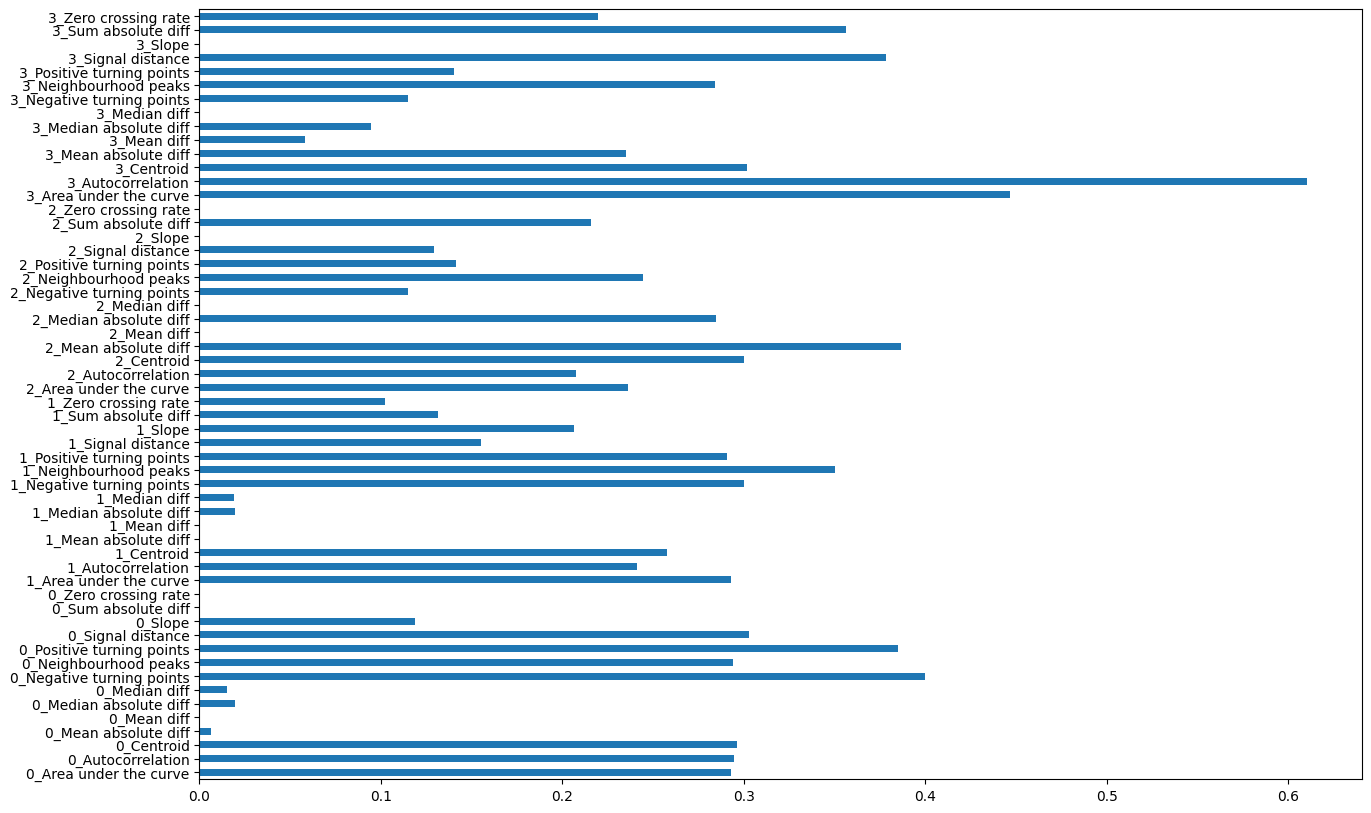

In [4]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

X_new = mutual_info_classif(X, Y)
feat_imp = pd.Series(X_new, features_df.columns[1:len(features_df.columns)-1])
#Si volvio a generar los datos intercambie por la linea comentada.
#feat_imp = pd.Series(X_new, features_df.columns[0:len(features_df.columns)-1])
plt.figure(figsize=(15, 10))
feat_imp.plot(kind='barh')
plt.show()

In [5]:
# Calcular el valor medio entre 0.2 y 0.3
umbral = (0.2 + 0.3) / 2

# Filtrar las características con valores mayores al umbral
selected_features = features_df.columns[np.where(X_new > umbral)].tolist()

# Mostrar las características seleccionadas
print("Características seleccionadas con valor mayor a", umbral, ":", selected_features)

features_df_info_gain = features_df[selected_features]

Características seleccionadas con valor mayor a 0.25 : ['Unnamed: 0', '0_Area under the curve', '0_Autocorrelation', '0_Median diff', '0_Negative turning points', '0_Neighbourhood peaks', '0_Positive turning points', '0_Zero crossing rate', '1_Autocorrelation', '1_Median diff', '1_Negative turning points', '1_Neighbourhood peaks', '2_Autocorrelation', '2_Centroid', '2_Mean diff', '2_Zero crossing rate', '3_Area under the curve', '3_Autocorrelation', '3_Negative turning points', '3_Positive turning points', '3_Slope']


#### Random Forest Importance

<Axes: >

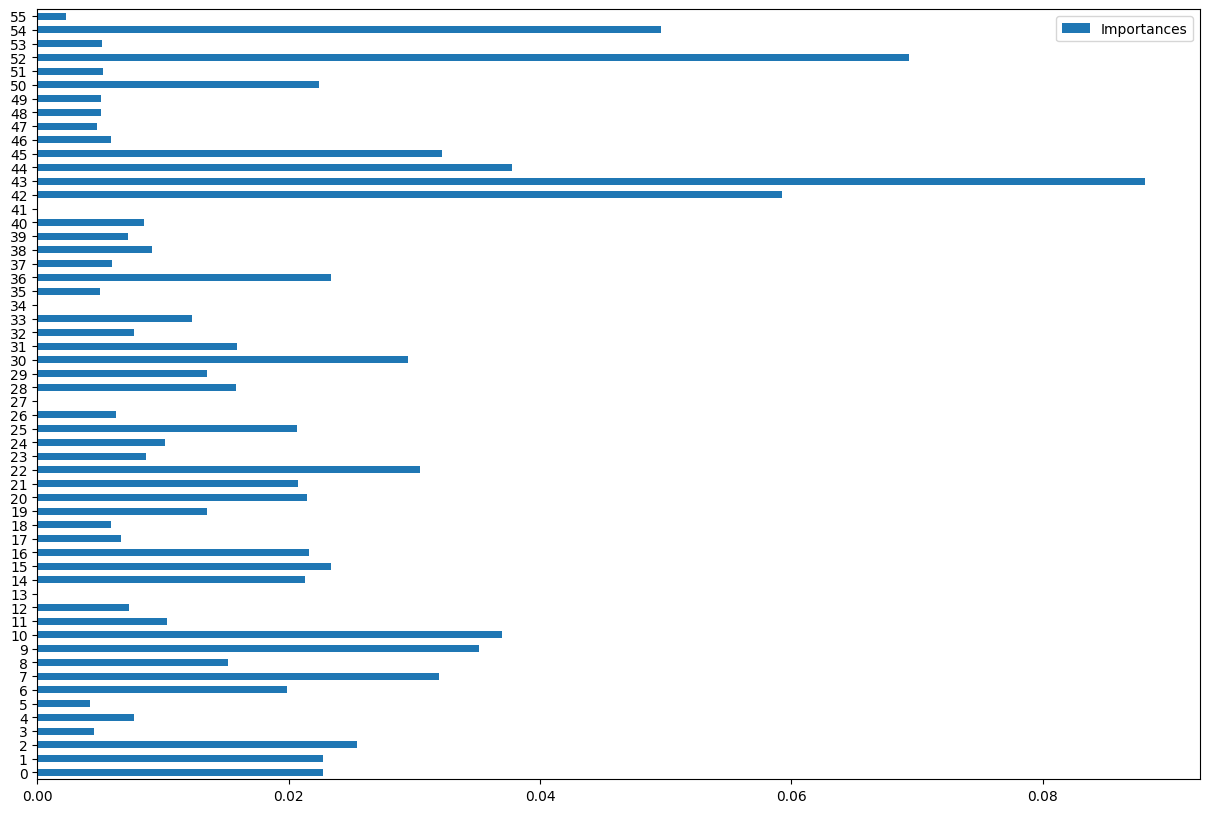

In [6]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=340)
model.fit(X,Y)
importances = model.feature_importances_

feat_df = pd.DataFrame({"Features": pd.DataFrame(X).columns, "Importances": importances})
feat_df.set_index('Importances')
feat_df.plot.barh(figsize=(15, 10))

In [7]:
# Filtrar las características con importancia mayor a 0.04
selected_features = feat_df.loc[feat_df['Importances'] > 0.03, 'Features'].tolist()

# Mostrar las características seleccionadas
print("Características seleccionadas con importancia mayor a 0.04:", selected_features)
features_df_importance = features_df[selected_features]

Características seleccionadas con importancia mayor a 0.04: ['0_Negative turning points', '0_Positive turning points', '0_Signal distance', '1_Neighbourhood peaks', '3_Area under the curve', '3_Autocorrelation', '3_Centroid', '3_Mean absolute diff', '3_Signal distance', '3_Sum absolute diff']


### Selección de modelos

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [9]:
names = [
    "Nearest Neighbors",
    "Decision Tree",
    "AdaBoost",
    "Naive Bayes",
    "Linear SVM",
]
modelos = [
    KNeighborsClassifier(n_neighbors=6),
    DecisionTreeClassifier(max_depth=10),
    AdaBoostClassifier(),
    GaussianNB(),
    SVC(kernel='linear')
]

In [10]:
def validacion_cruzada(model, X, y):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    precision_scores = []
    recall_scores = []
    f1_scores = []
    accuracies = []

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)

        X_test_np = X_test.values
        y_pred = model.predict(X_test_np)

        precision = precision_score(y_test, y_pred, average='weighted')
        precision_scores.append(precision)

        recall = recall_score(y_test, y_pred, average='weighted')
        recall_scores.append(recall)

        f1 = f1_score(y_test, y_pred, average='weighted')
        f1_scores.append(f1)

        accuracy = model.score(X_test, y_test)
        accuracies.append(accuracy)

    return np.mean(precision_scores), np.mean(recall_scores), np.mean(f1_scores), np.mean(accuracies)


In [11]:
encoder = LabelEncoder()
y_encode = encoder.fit_transform(Y)
y_encode

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2],
      dtype=int64)

##### Con los features de infoGain

In [12]:
X = features_df_info_gain.iloc[::]
resultados = []

for nombre, modelo in zip(names, modelos):
    precision, recall, f1, accuracy = validacion_cruzada(model=modelo, X=X, y=y_encode)
    resultados.append({"nombre": nombre, "precision": precision, "recall": recall, "f1_score": f1, "accuracy": accuracy})

df_resultados = pd.DataFrame(resultados)

In [ ]:
df_resultados

##### Con los features de Random Forest Importance

In [ ]:
model = RandomForestClassifier(n_estimators=340)
f1s, sensitivity, specificity, accuracy = validacion_cruzada(model=model, X=features_df_importance, y=y_encode)
print("F1-score medio:", f1s)
print("Sensibilidad media:", sensitivity)
print("Especificidad media:", specificity)
print("Precisión media:", accuracy)

### Entrenamiento

### Validación